In [126]:
##Data generation
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/gdrive')
# open('/content/gdrive/My Drive/Colab Notebooks/MDM project/FirstDataset_Stress1.csv').read()

stress1=np.array([])
stress2=np.array([])
stress3=np.array([])
strain=np.array([]) #creating the array
# using loadtxt()
stress1 = np.loadtxt("/content/gdrive/My Drive/Colab Notebooks/MDM project/FirstDataset_Stress1.csv",
                 delimiter=",", dtype=float)
print("the array is=")
#displaying our result.
print(stress1)
type(stress1)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
the array is=
[0.25 0.45 0.5  0.52 0.55 0.54 0.57 0.6  0.66 0.67]


numpy.ndarray

In [127]:
#help(np.ndarray)

In [128]:
stress2 = np.loadtxt("/content/gdrive/My Drive/Colab Notebooks/MDM project/FirstDataset_Stress2.csv",
                 delimiter=",", dtype=float)
stress3 = np.loadtxt("/content/gdrive/My Drive/Colab Notebooks/MDM project/FirstDataset_Stress3.csv",
                 delimiter=",", dtype=float)
strain = np.loadtxt("/content/gdrive/My Drive/Colab Notebooks/MDM project/FirstDataset_Strain.csv",
                 delimiter=",", dtype=float)
print(stress2)
print(stress3)
print(strain)

[0.2706  0.40318 0.47769 0.47462 0.50971 0.57235 0.58948 0.58171 0.70502
 0.62344]
[0.24387 0.43816 0.52655 0.54952 0.51869 0.53898 0.56456 0.61463 0.68094
 0.69547]
[0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5 ]


In [129]:
#Observation = E values based on a linear elastic model.

list1 = stress1/strain

list2 = stress2/strain

list3 = stress3/strain

type(list1)

numpy.ndarray

In [130]:

observation = np.concatenate((list1, list2,list3), axis=0)

print(observation)

type(observation)

[5.         4.5        3.33333333 2.6        2.2        1.8
 1.62857143 1.5        1.46666667 1.34       5.412      4.0318
 3.1846     2.3731     2.03884    1.90783333 1.68422857 1.454275
 1.56671111 1.24688    4.8774     4.3816     3.51033333 2.7476
 2.07476    1.7966     1.61302857 1.536575   1.5132     1.39094   ]


numpy.ndarray

2.5236958783068784


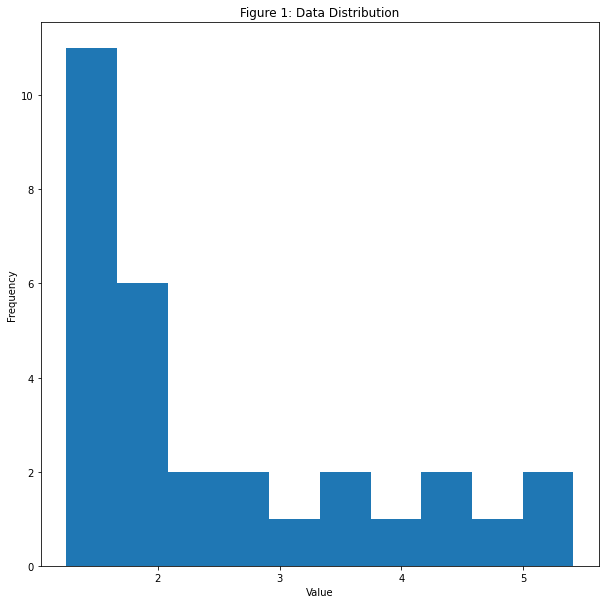

In [131]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
ax.hist(observation)
ax.set_xlabel("Value")
ax.set_ylabel("Frequency")
ax.set_title("Figure 1: Data Distribution")
mu_obs=observation.mean()
print(mu_obs)
plt.show()

In [132]:
##Likelihood and acceptance with iteration
#The tranistion model defines how to move from sigma_current to sigma_new
transition_model = lambda x: [x[0],np.random.normal(x[1],0.5)] 

#lambda x: f(x) is an alternative way to create a function
#"lambda" [parameter_list] ":" expression 
#==def <lambda>(parameters):
#    return expression
#random.normal(Mean, Standard deviation, Output shape)

#Hence, this transition function makes the mean the same and randomly reassign
#variance using another nomarl distribution (mean2=old variance, variance2=0.5)
#"a tutorial..." paper p11 talks about updating variance2 in the "apdative method".

def prior(x):
    #x[0] = mu, x[1]=sigma (new or current) #Important!
    #returns 1 for all valid values of sigma. Log(1) =0, so it does not affect the summation.
    #returns 0 for all invalid values of sigma (<=0). Log(0)=-infinity, and Log(negative number) is undefined.
    #It makes the new sigma infinitely unlikely.
    if(x[1] <=0):
        return 0
    return 1

#Computes the likelihood of the data given a sigma (new or current) according to equation (2)
#Apply log() to simplify computation
def likelihood_computer(x,data):
    #x[0]=mu, x[1]=sigma (new or current) #Important!
    #data = the observation
    return np.sum(-np.log(x[1] * np.sqrt(2* np.pi) )-((data-x[0])**2) / (2*x[1]**2))
    #x[1] is S_noise in 'a tutorial...' paper

#Defines whether to accept or reject the new sample
def acceptance_rule(x, x_new):
    if x_new>x:
        return True
    else:
        accept=np.random.uniform(0,1)
        # Since we did a log likelihood, we need to exponentiate in order to compare to the random number
        # less likely x_new are less likely to be accepted
        return (accept < (np.exp(x_new-x)))


def metropolis_hastings(likelihood_computer,prior,transition_model, param_init,iterations,data,acceptance_rule):
    # likelihood_computer(x,data): returns the likelihood that these parameters generated the data
    # transition_model(x): a function that draws a sample from a symmetric distribution and returns it
    # param_init: a starting sample
    # iterations: number of accepted to generated
    # data: the data that we wish to model
    # acceptance_rule(x,x_new): decides whether to accept or reject the new sample
    x = param_init
    accepted = []
    rejected = []   
    for i in range(iterations):
        x_new =  transition_model(x)    
        x_lik = likelihood_computer(x,data)
        x_new_lik = likelihood_computer(x_new,data) 
        if (acceptance_rule(x_lik+np.log(prior(x)),x_new_lik+np.log(prior(x_new)))):            
            x = x_new
            accepted.append(x_new)
        else:
            rejected.append(x_new)            
                
    return np.array(accepted), np.array(rejected)

In [133]:
##Step 6: Run the algorithm with initial parameters and collect accepted and rejected samples
accepted, rejected = metropolis_hastings(likelihood_computer,prior,transition_model,[mu_obs,0.1],2000,observation,acceptance_rule)
print(accepted)
print(rejected)
#The visualization code is not included but it is not important.

[[2.52369588 0.82723954]
 [2.52369588 1.15740782]
 [2.52369588 1.48313194]
 ...
 [2.52369588 1.50853488]
 [2.52369588 1.43733254]
 [2.52369588 1.24677833]]
[[ 2.52369588 -0.29201011]
 [ 2.52369588  1.54289089]
 [ 2.52369588  0.64288404]
 ...
 [ 2.52369588  2.18098201]
 [ 2.52369588  1.14631279]
 [ 2.52369588  0.86917698]]


<ipython-input-132-e8bd0a445289>:29: RuntimeWarning: invalid value encountered in log
  return np.sum(-np.log(x[1] * np.sqrt(2* np.pi) )-((data-x[0])**2) / (2*x[1]**2))
<ipython-input-132-e8bd0a445289>:57: RuntimeWarning: divide by zero encountered in log
  if (acceptance_rule(x_lik+np.log(prior(x)),x_new_lik+np.log(prior(x_new)))):


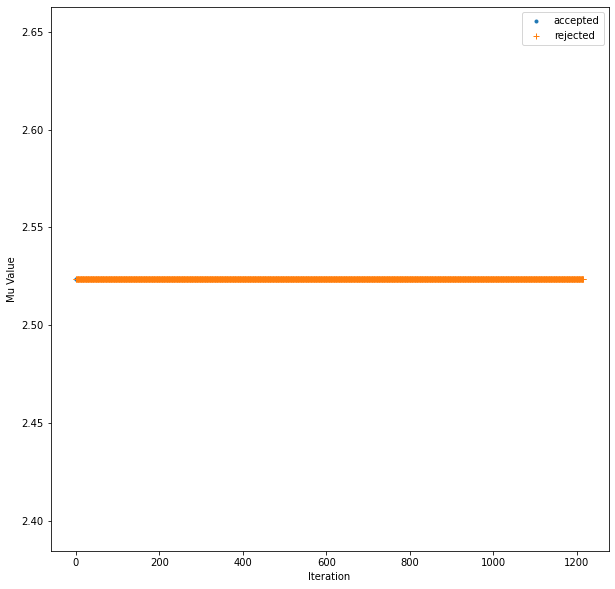

In [134]:
# Plot the posterior distribution of the slope and intercept
fig2 = plt.figure(figsize=(10,10))
axs = fig2.add_subplot(1,1,1)

# Plot the trace of the parameters
axs.plot(accepted[:,0],label='accepted',marker='.', linestyle='none')
axs.plot(rejected[:,0],label='rejected',marker='+', linestyle='none')
axs.set_xlabel('Iteration')
axs.set_ylabel('Mu Value')
axs.legend()

plt.show()

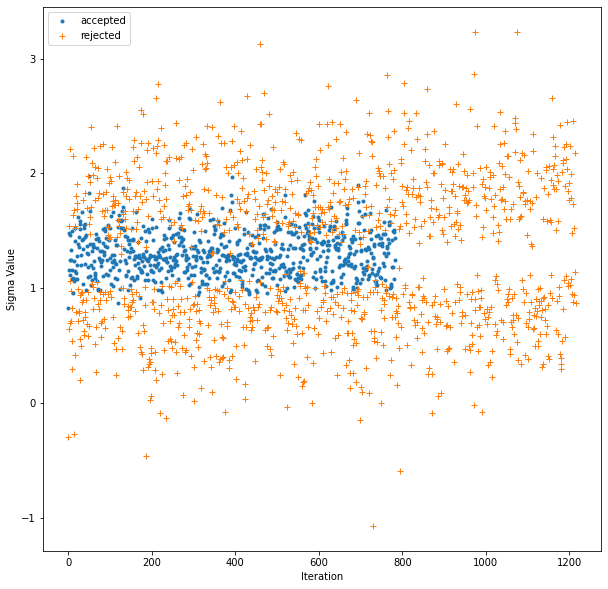

In [135]:
# Plot the posterior distribution of the slope and intercept
fig3 = plt.figure(figsize=(10,10))
axs = fig3.add_subplot(1,1,1)

# Plot the trace of the parameters
axs.plot(accepted[:,1],label='accepted',marker='.', linestyle='none')
axs.plot(rejected[:,1],label='rejected',marker='+', linestyle='none')
axs.set_xlabel('Iteration')
axs.set_ylabel('Sigma Value')
axs.legend()

plt.show()

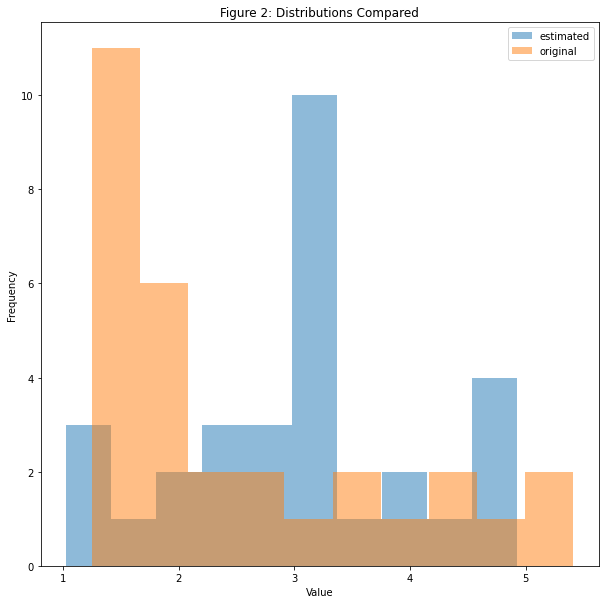

In [138]:
#See how the probablitistic model compare with original data
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
mod1=lambda t:np.random.normal(accepted[-1,0],accepted[-1,1],t)
population = mod1(30)

ax.hist(population,label='estimated',alpha = 0.5)
ax.hist(observation,label='original',alpha = 0.5)
ax.set_xlabel("Value")
ax.set_ylabel("Frequency")
ax.set_title("Figure 2: Distributions Compared")
ax.legend()

plt.show()